<a href="https://colab.research.google.com/github/hanafimajid/tpot-mtr/blob/main/enb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tpot
from tpot import TPOTRegressor
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=5d7ab8ac449b4b8a2cdad00d7a3d3fcda7d52bad586bb68c888c03e28ed9c71e
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()


Saving enb.csv to enb.csv


In [ ]:
import pandas as pd
df = pd.read_csv("enb.csv")
df.head()
y_col = [
'Y1',
'Y2'

]
y = df[y_col]
#x_col_id = ['id']
#x_id = df[x_col_id]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
#X = df[df.columns.drop(y)]
#X=df.drop(columns=['id'])
X=df[df.columns.drop(y)]
#X=df.drop(y,x_id)
y.head()


,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))

# Choose a transformer for the target variable (e.g., StandardScaler)
target_transformer = scaler




In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
#rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))
rfg = MultiOutputRegressor(TPOTRegressor(generations=5, population_size=50,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10, scoring='neg_mean_squared_error'))
# Create a TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=rfg, transformer=target_transformer)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)





Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00020091866695244744

Generation 2 - Current best internal CV score: -0.00015041209918211027

Generation 3 - Current best internal CV score: -0.0001452417358231446

Generation 4 - Current best internal CV score: -9.894430603140942e-05

Generation 5 - Current best internal CV score: -9.894430603140942e-05

Best pipeline: XGBRegressor(RobustScaler(input_matrix), learning_rate=0.5, max_depth=5, min_child_weight=2, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.8, verbosity=0)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.000984753001302052

Generation 2 - Current best internal CV score: -0.000984753001302052

Generation 3 - Current best internal CV score: -0.000984753001302052

Generation 4 - Current best internal CV score: -0.0009434185550152574

Generation 5 - Current best internal CV score: -0.0009434185550152574

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.5, max_depth=10, min_child_weight=16, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9000000000000001, verbosity=0)


0.9953366004002244

In [ ]:
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse1=np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE  is',rmse1)
mae1=mean_absolute_error(y_test, y_pred)
print('MAE is',mae1)

# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)


def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss

rrmse2=relative_root_mean_squared_error(y_test,y_pred)
arrmse2=mean(rrmse2)
percentage_average_relative_rmse2 = arrmse2 * 100
print("rrmse =",rrmse2)
print("arrmse =", arrmse2)
print(f"Percentage arrmse = {percentage_average_relative_rmse2:.2f}%")

RMSE  is 0.589714040701685
MAE is 0.3817817787071327
rmse_per_output: [0.32514183 0.76798964]
rrmse = Y1    0.000773
Y2    0.001827
dtype: float64
arrmse = 0.001299960266421931
Percentage arrmse = 0.13%


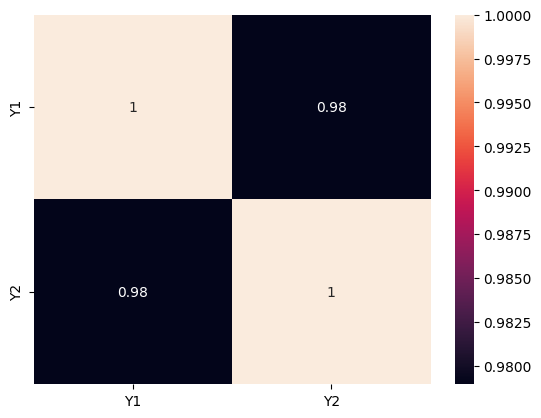

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=2, random_state=None, max_iter=10000000)
chain = RegressorChain(base_estimator=reg, order=[0,1]).fit(X_train, y_train)
# Create a TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=chain, transformer=target_transformer)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
model.score(X_test, y_test)

[LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8986382295477287

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse2=math.sqrt(mean_squared_error(y_test, y_pred2))
print('RMSE  is',rmse2)
mae2=mean_absolute_error(y_test, y_pred2)
print('MAE is',mae2)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, y_pred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)


def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse2=relative_root_mean_squared_error(y_test,y_pred2)
arrmse2=np.mean(rrmse2)
percentage_average_relative_rmse2 = arrmse2 * 100
print("arrmse =", arrmse2)
print(f"Percentage arrmse = {percentage_average_relative_rmse2:.2f}%")

RMSE  is 2.8330829319976396
MAE is 2.053211044371722
rmse_per_output: [2.88364647 2.78160041]
arrmse = 0.006712262294826252
Percentage arrmse = 0.67%


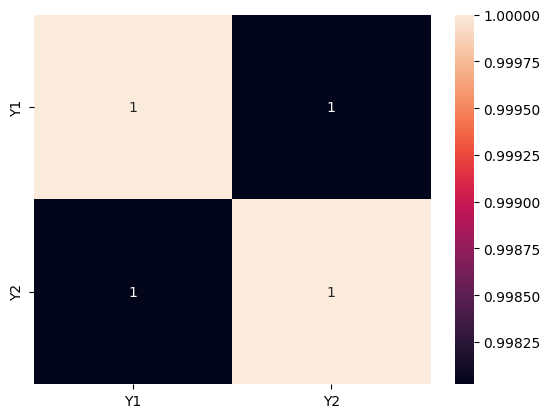

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
from sklearn.svm import LinearSVR
class MultiOutputTP(object):
  def __init__(self, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
  def fit(self, X, y):
    X, y = map(np.atleast_2d, (X, y))
    assert X.shape[0] == y.shape[0]
    yy = y.shape[1]
    self.regs = []
    for i in range(yy):
#while i <= Ny:
      reg = TPOTRegressor(generations=5, population_size=50,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10,scoring='neg_mean_squared_error')
      #reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=1, random_state=123, max_iter=10000)
      Xi = np.hstack([X, y[:, :i]])
      yi = y[:, i]
      self.regs.append(reg.fit(Xi, yi))


    return self
  def predict(self, X):
    y = np.empty([X.shape[0], len(self.regs)])
    for i, reg in enumerate(self.regs):
      y[:, i] = reg.predict(np.hstack([X, y[:, :i]]))
    return y


In [ ]:
import numpy as np
from tpot import decorators
#decorators.MAX_EVAL_SECS = 240
reg2 = MultiOutputTP(1).fit(X_train, y_train)
#X = np.dtype('float64')



Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.2709730120106107

Generation 2 - Current best internal CV score: -0.21351823626547062

Generation 3 - Current best internal CV score: -0.21351823626547062

Generation 4 - Current best internal CV score: -0.21351823626547062

Generation 5 - Current best internal CV score: -0.1870607499820282

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.5, max_depth=7, min_child_weight=18, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.8500000000000001, verbosity=0)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.1079703534368703

Generation 2 - Current best internal CV score: -2.1079703534368703

Generation 3 - Current best internal CV score: -2.1079703534368703

Generation 4 - Current best internal CV score: -2.1079703534368703

Generation 5 - Current best internal CV score: -2.1079703534368703

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=5, min_child_weight=14, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9000000000000001, verbosity=0)


In [ ]:
Ypred2 = reg2.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9901009781439639


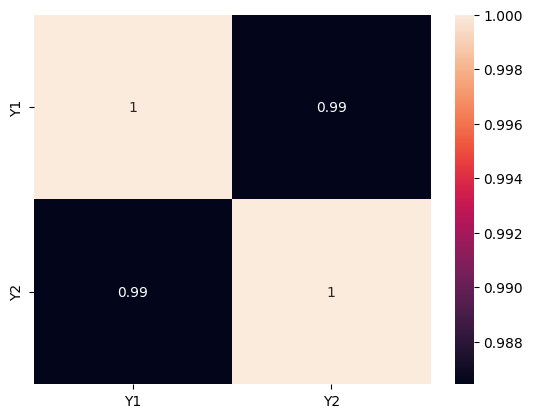

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(Ypred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse3=math.sqrt(mean_squared_error(y_test, Ypred2))
print('RMSE  is',rmse3)
mae3=mean_absolute_error(y_test, Ypred2)
print('MAE  is',mae3)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, Ypred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse3=relative_root_mean_squared_error(y_test,Ypred2)
arrmse3=np.mean(rrmse3)
percentage_average_relative_rmse3 = arrmse3 * 100
print("relative_root_mean_squared_error =", rrmse3)
print("arrmse =", arrmse3)
print(f"Percentage arrmse = {percentage_average_relative_rmse3:.2f}%")

RMSE  is 0.8561461700240401
MAE  is 0.5290199424074844
rmse_per_output: [0.39665118 1.1439582 ]
relative_root_mean_squared_error = Y1    0.000945
Y2    0.002726
dtype: float64
arrmse = 0.0018358142128241531
Percentage arrmse = 0.18%
